In [33]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans

In [39]:
image_path = "../output_videos/player_image.jpg"

print(os.path.exists(image_path))

image = cv2.imread(image_path)
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)

True


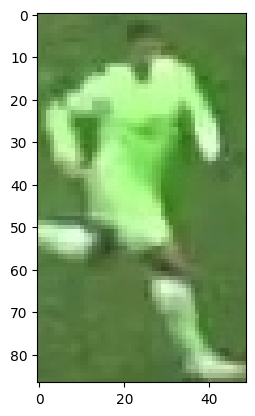

In [40]:
plt.imshow(image)
plt.show()

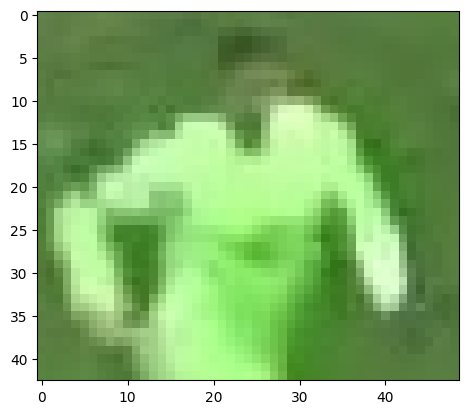

In [41]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

c:\Users\Tejas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


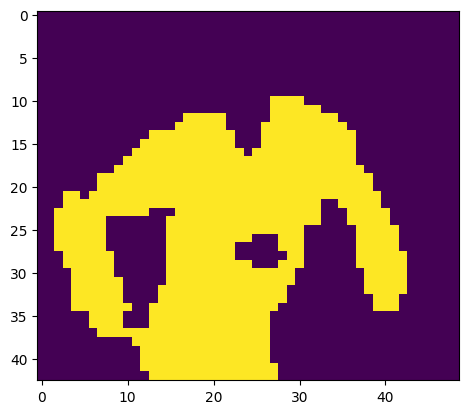

In [45]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [51]:
corner_cluster = [clustered_image[0,0] , clustered_image[0,-1] , clustered_image[-1,0] , clustered_image[-1,-1]]
non_player_cluster = max(set(corner_cluster) , key = corner_cluster.count)
print(non_player_cluster)

0


In [53]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [54]:
kmeans.cluster_centers_[player_cluster]

array([171.27469553, 235.67253045, 143.06495264])